In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from scipy.integrate import trapz

In [2]:

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
cmb_smica_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CMB_IQU-smica_2048_R3.00_full.fits")


In [4]:
nside = 512


In [5]:

lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [6]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_14562/2172233455.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 21600/ell


In [7]:
jmax = 9

In [8]:
cmb_smica_map = hp.ud_grade(cmb_smica_map, nside_out=nside)

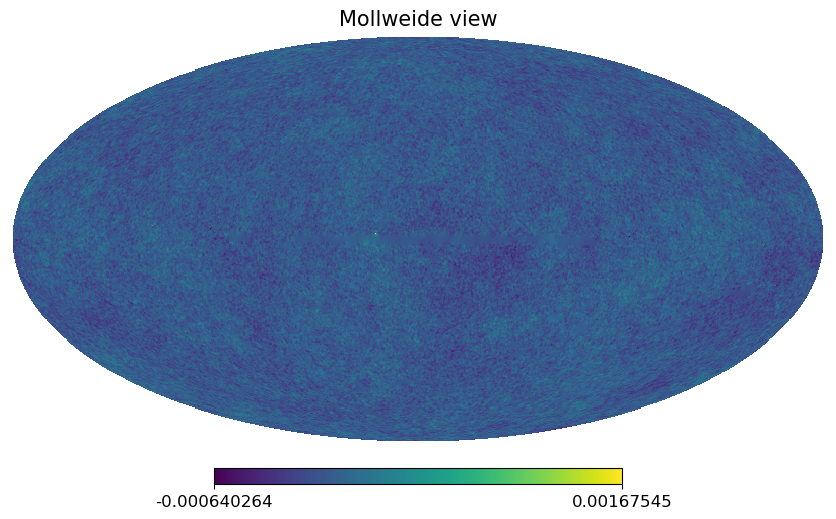

In [9]:
hp.mollview(cmb_smica_map)

In [12]:
cmb_mask = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits")

In [13]:
cmb_mask = hp.ud_grade(cmb_mask, nside_out=nside)

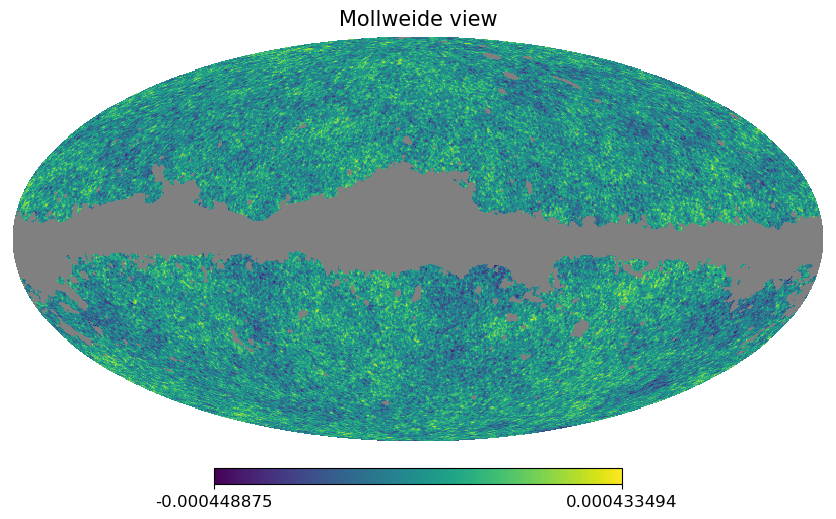

In [14]:
cmb_masked = hp.ma(cmb_smica_map)
cmb_masked.mask = np.logical_not (cmb_mask)
hp.mollview(cmb_masked)

In [17]:
cmb_cl = hp.anafast(cmb_smica_map)

In [18]:
cmb_gaus_map = hp.synfast(cmb_cl,nside)


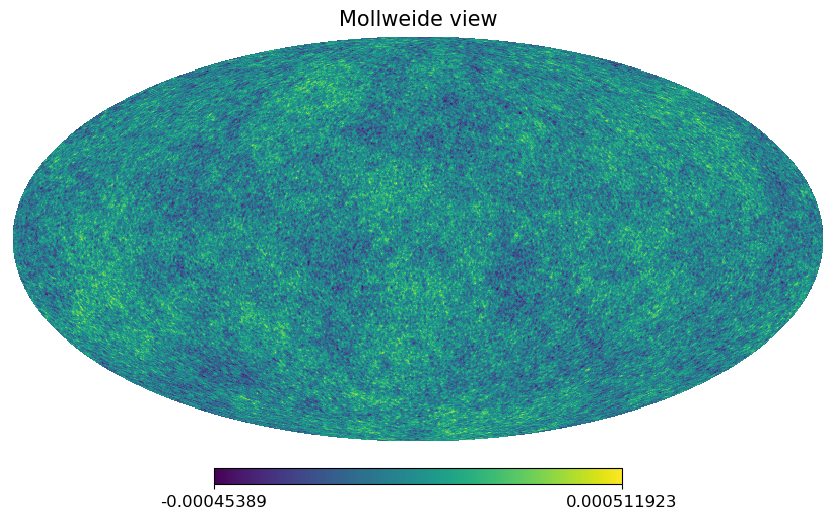

In [20]:
hp.mollview(cmb_gaus_map)

In [21]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [22]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)


In [ ]:
cmb_s0 = np.mean(cmb_masked)

In [ ]:
gaus_s0 = np.mean(cmb_gaus_map)

In [30]:
cmb_s1 , cmb_i1 = ST.compS1(cmb_smica_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [31]:
gaus_s1 , gaus_i1 = ST.compS1(cmb_gaus_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [32]:
cmb_s2 , cmb_i2 = ST.compS2(cmb_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [62]:
gaus_s2 , gaus_i2 = ST.compS2(gaus_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


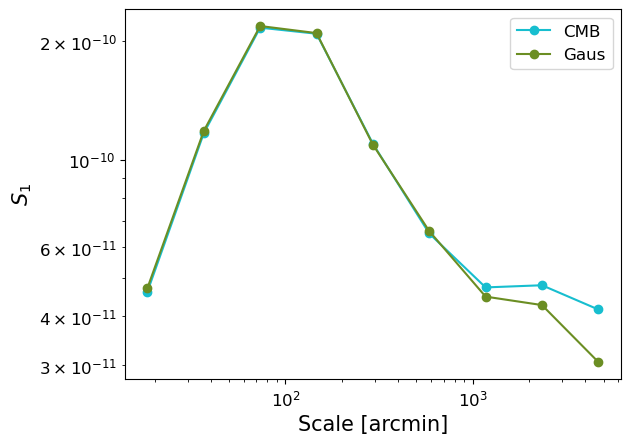

In [57]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, cmb_s1**2, 'o-', lw=1.5 , color = "tab:cyan")
plt.loglog (scale, gaus_s1**2 ,'o-', lw=1.5, color = "olivedrab")
#plt.loglog(scale, websky_s1, 'o-', lw=1.5 , color = "tab:purple")
#plt.loglog(scale, magneicum_s1, 'o-', lw=1.5 , color = "darkorange")
#plt.loglog(scale, simons_s1, 'o-', lw=1.5 , color = "darkred")
#plt.loglog(scale, mat_s1**2, 'o-', lw=1.5 , color = "pink")
#plt.loglog (ellsc , milca_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , websky_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , magneicum_cl*ell*(ell+1)/(2*np.pi))
plt.ylabel(r"$S_1$")
plt.xlabel("Scale [arcmin]")
#plt.xticks ([100,  1000],[100,1000])
plt.legend (["CMB","Gaus" ])
#plt.savefig("SZ_sim_S11.pdf",bbox_inches = 'tight', pad_inches=0.1)

In [58]:
gaus_cl = hp.anafast(cmb_gaus_map)

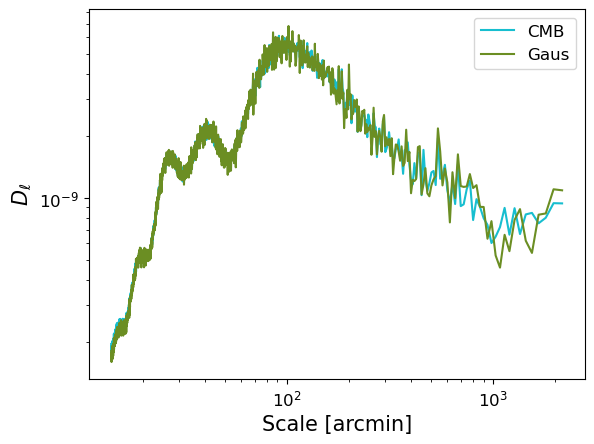

In [59]:
plt.loglog (ellsc[10:] , (cmb_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "tab:cyan")
plt.loglog (ellsc[10:] , (gaus_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "olivedrab")
#plt.loglog (ellsc[10:] , (websky_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "tab:purple")
#plt.loglog (ellsc[10:] , (magneicum_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "darkorange")
#plt.loglog (ellsc[10:] , (simons_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "darkred")
#plt.loglog (ellsc , mat_cl*ell*(ell+1)/(2*np.pi) , color = "pink")
plt.legend (["CMB","Gaus" ])
plt.xlabel ("Scale [arcmin]") 
plt.ylabel (r"$D_\ell$") 
#plt.xticks ([100,  1000],[100,1000])
#plt.savefig("SZ_sim_cll.pdf",bbox_inches = 'tight', pad_inches=0.1)


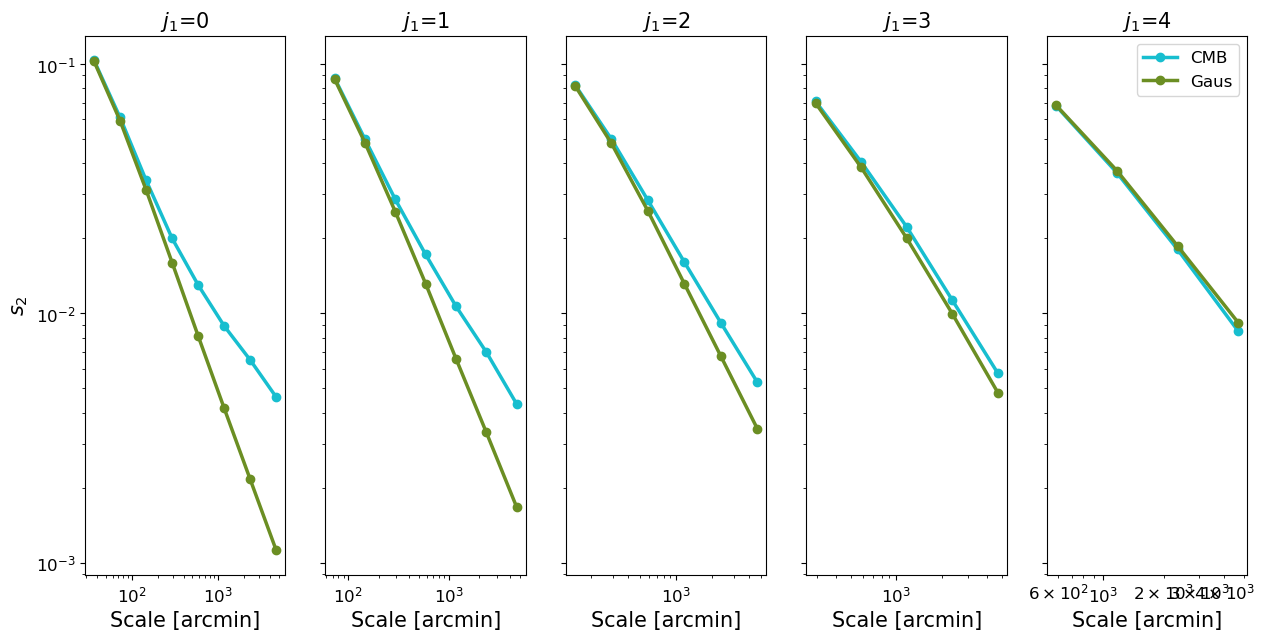

In [63]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(15,7))
for j in range (5):
    ax[j].plot (scale[j+1:],cmb_s2[j,j+1:]/cmb_s1[j],'o-' , color = "tab:cyan" , lw = 2.5)
    ax[j].plot (scale[j+1:],gaus_s2[j,j+1:]/gaus_s1[j],'o-' , color = "olivedrab" , lw = 2.5)
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],simons_s2[j,j+1:]/simons_s1[j],'o-' , color = "darkred" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel("Scale [arcmin]")
    ax[j].set_yscale('log')
    ax[j].set_xscale('log')
ax[0].set_ylabel(r"$s_2$" )
plt.legend (["CMB","Gaus"])
#plt.savefig("SZ_sim_S22.pdf",bbox_inches = 'tight', pad_inches=0.1)

In [35]:
N = 20
s1_array = np.zeros ((N, jmax))
s2_array = np.zeros ((N,jmax,jmax))
for i in range (N):
    
    #tmp_alm = hp.synalm(cmb_cl)
    #tmp_out_cl = hp.alm2cl(tmp_alm)
    #for a in range (len (tmp_alm)):
    #l,_ = hp.Alm.getlm(lmax, np.arange(len (tmp_alm)))
    #print (l)
        #print (l,m)
    #factor = np.sqrt(cmb_cl[l])/np.sqrt(tmp_out_cl[l])
    #print(len(factor))
    #tmp_alm = tmp_alm * factor 
    tmp_map = hp.synfast(cmb_cl, nside)
    tmp_s1 , tmp_i1 = ST.compS1(tmp_map, morlet_l_arr, jmax, nside)
    tmp_s2 , tmp_i2 = ST.compS2(tmp_i1, morlet_l_arr, jmax, nside)
    s2_array[i,:,:] = tmp_s2
    s1_array[i,:] = tmp_s1
    
    

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [36]:
s1_mean_arr = np.mean (s1_array, axis = 0)
s1_std_arr = np.std(s1_array, axis = 0)

In [37]:
s2_nom_array = np.zeros ((N,jmax,jmax))
for n in range (N):
    for j in range (jmax):
        s2_nom_array[n,j,:] = s2_array[n,j,:]/s1_array[n,j]

In [38]:
s1_array.shape

(20, 9)

In [39]:
s2_mean_arr = np.mean(s2_nom_array, axis = 0)
s2_std_arr = np.std(s2_nom_array, axis=0)

In [40]:
s1_std_arr.shape

(9,)

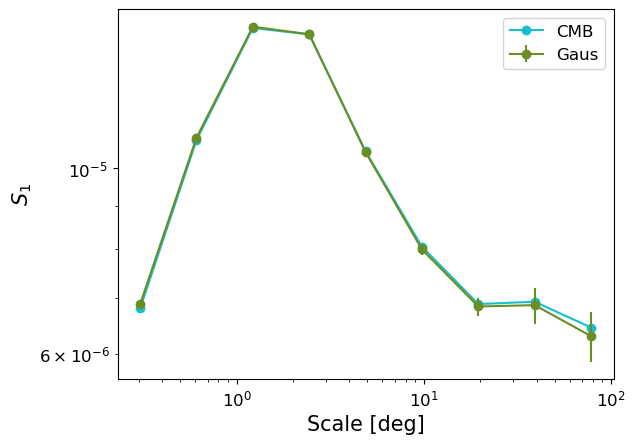

In [41]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale/60, cmb_s1, 'o-', lw=1.5 , color = "tab:cyan")
#plt.loglog (scale, s1_mean_arr**2 ,'o-', lw=1.5, color = "olivedrab")
plt.errorbar(scale/60, s1_mean_arr, yerr= s1_std_arr, fmt="o-",color = "olivedrab", lw=1.5)
plt.yscale("log")
plt.xscale ("log")
plt.ylabel(r"$S_1$")
plt.xlabel("Scale [deg]")
#plt.xticks ([100,  1000],[100,1000])
plt.legend (["CMB","Gaus" ])
#plt.savefig("SZ_sim_S11.pdf",bbox_inches = 'tight', pad_inches=0.1)

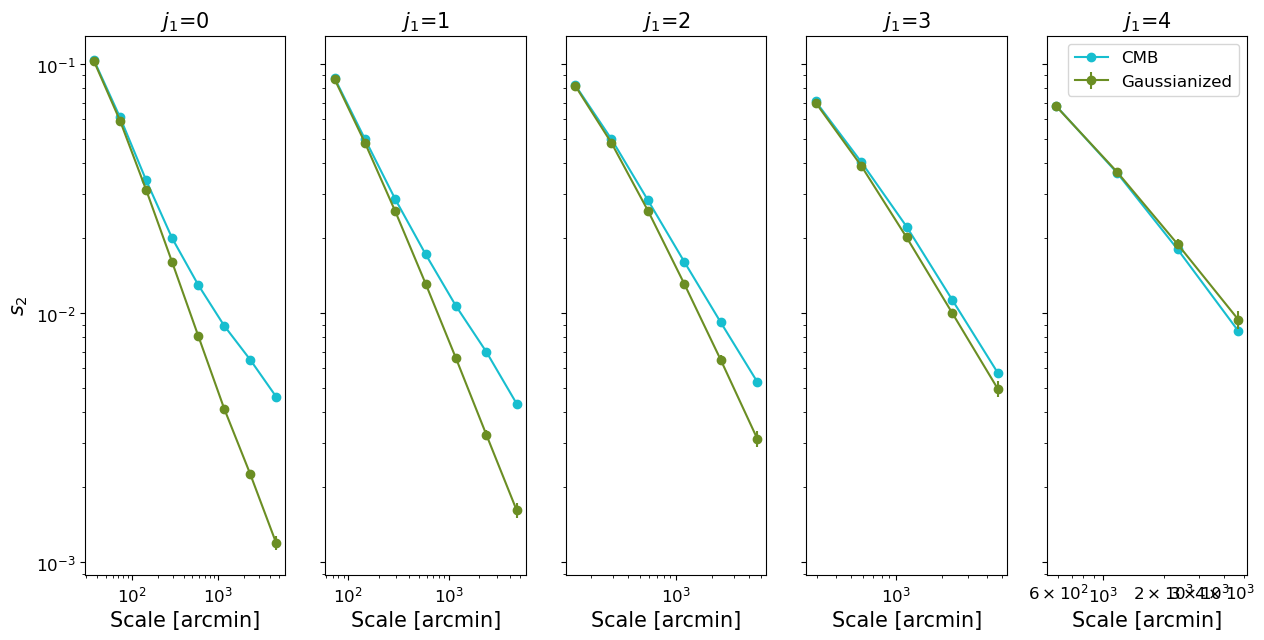

In [42]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(15,7))
for j in range (5):
    ax[j].plot (scale[j+1:],cmb_s2[j,j+1:]/cmb_s1[j],'o-' , color = "tab:cyan" , lw = 1.5)
    #ax[j].plot (scale[j+1:],s2_mean_arr[j,j+1:],'o-' , color = "olivedrab" , lw = 2.5)
    ax[j].errorbar (scale[j+1:],s2_mean_arr[j,j+1:], yerr = s2_std_arr[j,j+1:], fmt="o-" ,color = "olivedrab" , lw = 1.5)
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],simons_s2[j,j+1:]/simons_s1[j],'o-' , color = "darkred" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel("Scale [arcmin]")
    ax[j].set_yscale('log')
    ax[j].set_xscale('log')
ax[0].set_ylabel(r"$s_2$" )
plt.legend (["CMB","Gaussianized"])
#plt.savefig("SZ_sim_S22.pdf",bbox_inches = 'tight', pad_inches=0.1)

In [55]:
s2_mean_arr.shape

(9,)